 <img src="chayma.PNG">

<h3 style ="color : #0492C2 ; font-size: 40px; font-weight:900; "> I. Partie Théorique </h3>

<h3 style ="color : #da70d6 ; font-size: 30px; font-weight:900;"> 1) Segmentation</h3>
<h3 style ="color : CA4F81 ; font-size: 24px; font-weight:900;">   1.1 Définition</h3>

<p><u><b>La segmentation d'image</b></u> est une opération de traitement d'images qui a pour but de rassembler des pixels entre eux suivant des critères prédéfinis. Les pixels sont ainsi regroupés en régions, qui constituent un pavage ou une partition de l'image. Il peut s'agir par exemple de séparer les objets du fond. Si le nombre de classes est égal à deux, elle est appelée aussi binarisation.</p>
<p><b>La segmentation</b> est une étape primordiale en traitement d'image. À ce jour, il existe de nombreuses méthodes de segmentation, que l'on peut regrouper en quatre principales classes :
<ul>
    <li>La segmentation fondée sur les régions.</li>
    <li>La segmentation fondée sur les contours .</li>
<li>La segmentation fondée sur la classification ou le seuillage des pixels en fonction de leur intensité </li>
<li>La segmentation fondée sur la coopération entre les trois premières segmentations.</li>
</ul>
</p>

<h3 style ="color : CA4F81 ; font-size: 24px; font-weight:900;">   1.2 La segmentation fondée sur les régions</h3>

<p>Approche empirique basée sur l’histogramme</p>
<ul>
<li>Problème 1 : Effet du bruit</li>
<li>Problème 2 : Biais d’intensité</li>
<li>Problème 3 : Effet de la taille des régions</li>
</ul>

<h3 style ="color : #da70d6 ; font-size: 30px; font-weight:900;"> 2) Méthodes de filtrage </h3>
<h3 style ="color : CA4F81 ; font-size: 24px; font-weight:900;">   1.1 Filtrage </h3>


<b>Pourquoi filtrer une image ?</b>

*  Pour réduire le bruit dans l’image 
*  Pour détecter les contours d’une image 
*  Convolution entre une image f et un filtre h, appelé aussi masque de convolution

<b>- Filtrage linéaire</b>
*  filtrage passe-bas
* filtrage moyenne 
* filtrage gaussien

<b>- Filtrage non linéaire</b>
* Filtrage médian 
* Filtrage géométrique
* Filtrage moyen harmonique 
* Filtres max et min
* Filtre de point milieu

<h3 style ="color : #da70d6 ; font-size: 30px; font-weight:900;">  3) K-means</h3>
<br>


*  Un algorithme identifie les groupes dans les données.
*  La variable K représentant le nombre de groupes.
*  L'algorithme attribue chaque point de données (ou pixel) à l'un des groupes en fonction de la similitude des caractéristiques. Plutôt que d'analyser des groupes prédéfinis, le regroupement fonctionne de manière itérative pour former des groupes de manière organique.


<h3 style ="color : #0492C2 ; font-size: 40px; font-weight:900; "> II. Partie Pratique </h3>

<h3 style ="color : #da70d6 ; font-size: 30px; font-weight:900;"> 1) importation des bibliothéques</h3>
<br>


In [52]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import skimage.io
import matplotlib.pyplot as plt

<h3 style ="color : #da70d6 ; font-size: 30px; font-weight:900;">2) Ségmentation</h3>
<br>


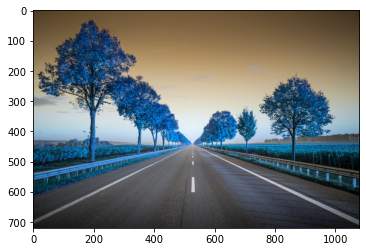

In [53]:


image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('nature2.jpg', quant)
plt.imshow(image)

cv2.imread('nature.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

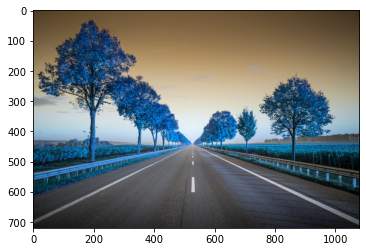

In [54]:
plt.imshow(image)

In [55]:
!pip install opencv-python

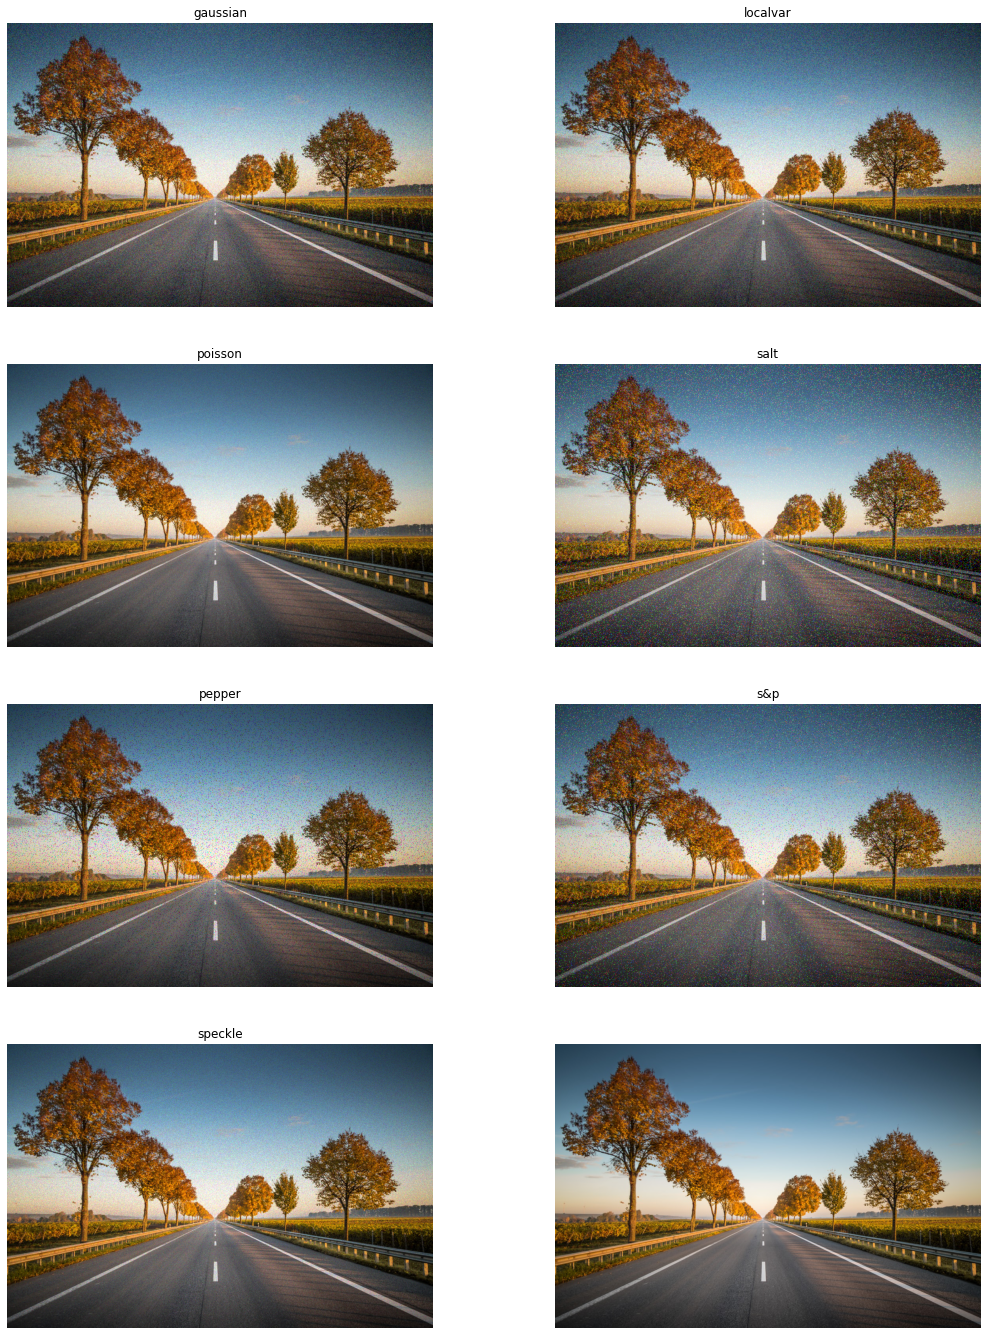

In [56]:
import skimage.io
import matplotlib.pyplot as plt
img_path="nature.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


In [65]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

img_path='nature.jpg'
img = skimage.io.imread(img_path)/255.0
def f(mode):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
interact(f,mode=['gaussian','localvar','poisson','salt','pepper','s&p','speckle',None]);

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'poisson', 'salt', 'pepper…

<img src="img.GIF">